In [1]:
import os
import shutil
import json
import tempfile
from pathlib import Path

from matplotlib import pyplot as plt
import numpy as np

from run_experiments import run_experiments, Result

In [2]:
# set envvars
# os.environ["OS_MEMORY_ALLOC_OVERRIDE"] = "25000000"
# os.environ["ENGINE_PATH"] = "./target/x86_64-apple-darwin/release/hash_engine"
os.environ["RUST_LOG"] = "info"
os.environ["ENGINE_WAIT_TIMEOUT"] = "1000"

In [3]:
# we need cwd to be the engine folder
os.chdir("./..")

In [4]:
# clear the output folders
def clear_outputs():
    try:
        shutil.rmtree('./output')
        shutil.rmtree('./parts')
    except FileNotFoundError:
        pass

In [5]:
def write_to_globals_and_benchmark(src_path: Path, globals_override: dict, num_steps: int):
    clear_outputs()
    with tempfile.TemporaryDirectory() as temp_folder:
        temp_path = shutil.copytree(
            src_path, 
            Path(temp_folder) / src_path.name # Python < 3.8 requires the directory to not already exist for copytree
        )
        
        # override the globals
        globals_path = temp_path / "src" / "globals.json"
        global_properties = json.loads(globals_path.read_text())
        global_properties.update(globals_override)
        globals_path.write_text(json.dumps(global_properties))
        
        # benchmark a single-run
        results = run_experiments(
            project_paths=[temp_path], 
            run_all_experiments=False,
            cli_args=["single-run", "--num-steps", f"{num_steps}"]
        )
        
        return results

In [6]:
def plot_time_and_mem(results):
    agents_to_uss = [(num_agents, res.max_uss_memory) for (num_agents, res) in results]
    agents_to_time = [(num_agents, res.time_to_completion) for (num_agents, res) in results]
    
    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_title('Max USS by Number of Agents')
    ax.set_xlabel('Number of Agents')
    # ax.set_xscale('log')
    ax.set_ylabel('Max USS (Unique Set Size) memory')
    ax.plot(*zip(*agents_to_uss))

    fig, ax = plt.subplots(figsize=(6,4))
    ax.set_title('Time Taken by Number of Agents')
    ax.set_xlabel('Number of Agents')
    # ax.set_xscale('log')
    ax.set_ylabel('Time Taken (s)')
    ax.plot(*zip(*agents_to_time))

In [7]:
# src_path = Path("./benchmarking/experiments/num_agents/no_behaviors/init_js/2_fields")
# write_to_globals_and_benchmark(src_path, {"num_agents": 5}, num_steps=2)

### Benchmark Number of Agents without Behaviors

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpezq_x6yo/no_fields single-run --num-steps 10
Time taken: 1.414428949356079
max_vms_memory: 9158103040
max_rss_memory: 48250880
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpcikl_v2d/no_fields single-run --num-steps 10
Time taken: 1.5181303024291992
max_vms_memory: 9359446016
max_rss_memory: 49909760
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpm0yz2f02/no_fields single-run --num-steps 10
Time taken: 1.5321099758148193
max_vms_memory: 9225326592
max_rss_memory: 54280192
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpnhwqj61m/no_fields single-run --num-steps 10
Time taken: 2.0998313426971436
max_vms_memory: 9313873920
max_rss_memory: 85004288
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp9idt52r5/no_fields single-run --num-steps 10
Time taken: 5.233525514602661
max_vms_memory: 9188614144
max_rss_memory: 185643008
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.21s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmplc78h9al/no_fields single-run --num-steps 10
Time taken: 40.67301559448242
max_vms_memory: 9369030656
max_rss_memory: 978857984
Running Experiment finished


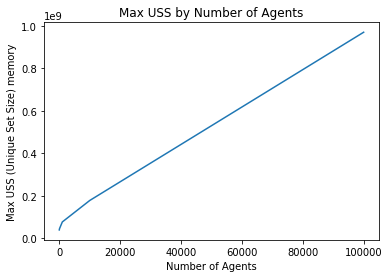

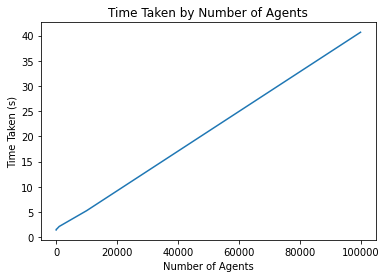

In [8]:
src_path = Path("./benchmarking/experiments/num_agents/no_behaviors/init_js/no_fields")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except (AttributeError, IndexError): # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmphjc472p_/1_field single-run --num-steps 10
Time taken: 1.6263389587402344
max_vms_memory: 9359446016
max_rss_memory: 48140288
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpblqo5s1l/1_field single-run --num-steps 10
Time taken: 1.5204153060913086
max_vms_memory: 9359446016
max_rss_memory: 50057216
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp2urtq7or/1_field single-run --num-steps 10
Time taken: 1.520674705505371
max_vms_memory: 9292435456
max_rss_memory: 55922688
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp9e4iozp9/1_field single-run --num-steps 10
Time taken: 1.9891955852508545
max_vms_memory: 9179656192
max_rss_memory: 87355392
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpe3_m3zi0/1_field single-run --num-steps 10
Time taken: 5.299684047698975
max_vms_memory: 9436073984
max_rss_memory: 212267008
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp3pvpg4ff/1_field single-run --num-steps 10
Time taken: 41.028780460357666
max_vms_memory: 9759109120
max_rss_memory: 1283158016
Running Experiment finished


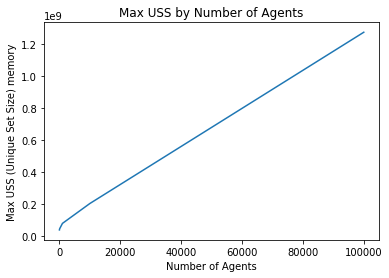

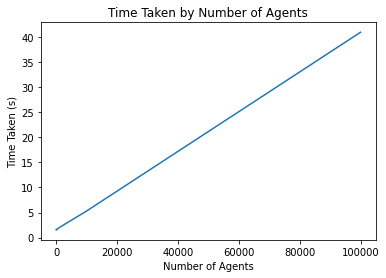

In [9]:
src_path = Path("./benchmarking/experiments/num_agents/no_behaviors/init_js/1_field")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except AttributeError: # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmplmq3_ejk/2_fields single-run --num-steps 10
Time taken: 1.5430254936218262
max_vms_memory: 9359446016
max_rss_memory: 48607232
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpukcznhx3/2_fields single-run --num-steps 10
Time taken: 1.5178096294403076
max_vms_memory: 9426554880
max_rss_memory: 50376704
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpipzhcyib/2_fields single-run --num-steps 10
Time taken: 1.6296875476837158
max_vms_memory: 9292435456
max_rss_memory: 56152064
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp3tnytwbv/2_fields single-run --num-steps 10
Time taken: 1.9629287719726562
max_vms_memory: 9246765056
max_rss_memory: 85565440
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpq3m_h9lm/2_fields single-run --num-steps 10
Time taken: 5.508220434188843
max_vms_memory: 9436073984
max_rss_memory: 200237056
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpcu_86u5c/2_fields single-run --num-steps 10
Time taken: 39.80504274368286
max_vms_memory: 9974661120
max_rss_memory: 1314582528
Running Experiment finished


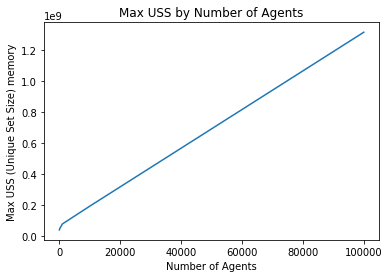

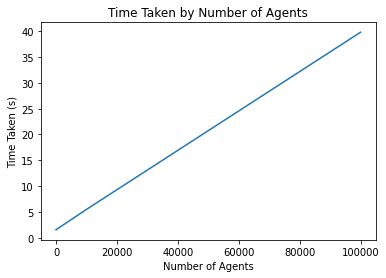

In [10]:
src_path = Path("./benchmarking/experiments/num_agents/no_behaviors/init_js/2_fields")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except AttributeError: # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp2mnlvya9/no_fields single-run --num-steps 10
Time taken: 1.5448386669158936
max_vms_memory: 9179095040
max_rss_memory: 48812032
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.22s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpi7dwsi6w/no_fields single-run --num-steps 10
Time taken: 1.6534764766693115
max_vms_memory: 9493663744
max_rss_memory: 50044928
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpwh4alga9/no_fields single-run --num-steps 10
Time taken: 1.748467206954956
max_vms_memory: 9313411072
max_rss_memory: 59326464
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpvdib3_6s/no_fields single-run --num-steps 10
Time taken: 2.5308361053466797
max_vms_memory: 9293422592
max_rss_memory: 116224000
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmphgya_275/no_fields single-run --num-steps 10
Time taken: 9.868003368377686
max_vms_memory: 9368965120
max_rss_memory: 234102784
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpvzttgq46/no_fields single-run --num-steps 10
Time taken: 86.97267770767212
max_vms_memory: 10074005504
max_rss_memory: 1244602368
Running Experiment finished


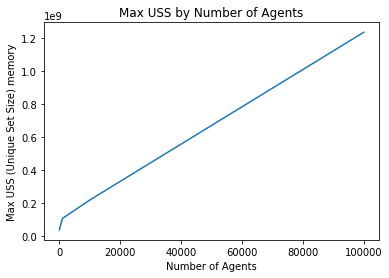

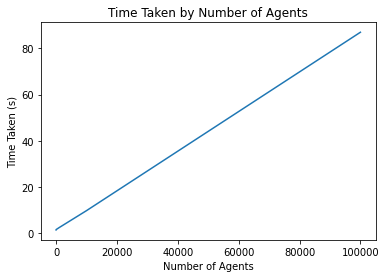

In [11]:
src_path = Path("./benchmarking/experiments/num_agents/empty_behavior/init_js/no_fields")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except (AttributeError, IndexError): # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpzd8qvel4/1_field single-run --num-steps 10
Time taken: 1.520667314529419
max_vms_memory: 9359446016
max_rss_memory: 49508352
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpvesvs02k/1_field single-run --num-steps 10
Time taken: 1.5212547779083252
max_vms_memory: 9225228288
max_rss_memory: 50417664
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpffri9t0p/1_field single-run --num-steps 10
Time taken: 1.739070177078247
max_vms_memory: 9359544320
max_rss_memory: 59330560
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpl0r0_ae5/1_field single-run --num-steps 10
Time taken: 2.5524988174438477
max_vms_memory: 9180180480
max_rss_memory: 108855296
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpg6bxcktj/1_field single-run --num-steps 10
Time taken: 10.292002439498901
max_vms_memory: 9389940736
max_rss_memory: 235843584
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpun82nxub/1_field single-run --num-steps 10
Time taken: 87.40954899787903
max_vms_memory: 10208223232
max_rss_memory: 1387966464
Running Experiment finished


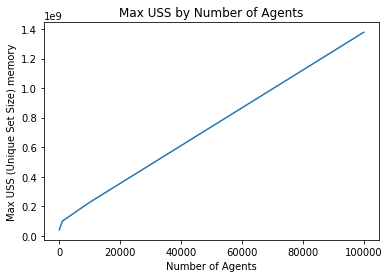

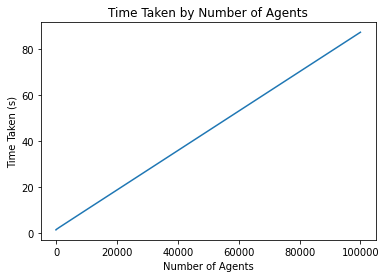

In [12]:
src_path = Path("./benchmarking/experiments/num_agents/empty_behavior/init_js/1_field")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except AttributeError: # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpwjo4w9ip/2_fields single-run --num-steps 10
Time taken: 1.51106595993042
max_vms_memory: 9426554880
max_rss_memory: 49483776
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.17s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpgdfh42t3/2_fields single-run --num-steps 10
Time taken: 1.5181267261505127
max_vms_memory: 9313312768
max_rss_memory: 50024448
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.17s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpt41_cjmf/2_fields single-run --num-steps 10
Time taken: 1.7412388324737549
max_vms_memory: 9359544320
max_rss_memory: 59576320
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp_p51wmp7/2_fields single-run --num-steps 10
Time taken: 2.5320825576782227
max_vms_memory: 9314398208
max_rss_memory: 105619456
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.17s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpmgyy47s1/2_fields single-run --num-steps 10
Time taken: 9.640869379043579
max_vms_memory: 9100529664
max_rss_memory: 226422784
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpc0ddqtsf/2_fields single-run --num-steps 10
Time taken: 87.14580726623535
max_vms_memory: 10154553344
max_rss_memory: 1398210560
Running Experiment finished


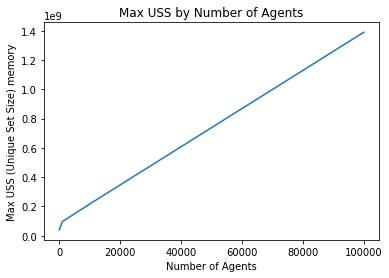

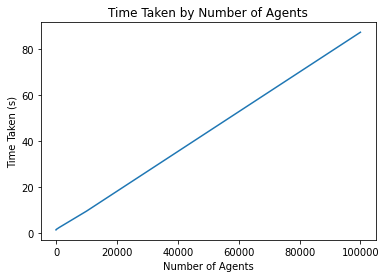

In [13]:
src_path = Path("./benchmarking/experiments/num_agents/empty_behavior/init_js/2_fields")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except AttributeError: # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

Benchmarking with 1 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpk4okw493/age_js single-run --num-steps 10
Time taken: 1.5188770294189453
max_vms_memory: 9246203904
max_rss_memory: 49401856
Running Experiment finished
Benchmarking with 10 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpg8901__n/age_js single-run --num-steps 10
Time taken: 1.5242505073547363
max_vms_memory: 9225228288
max_rss_memory: 50642944
Running Experiment finished
Benchmarking with 100 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmpoj7ookeu/age_js single-run --num-steps 10
Time taken: 1.6267726421356201
max_vms_memory: 9359544320
max_rss_memory: 60194816
Running Experiment finished
Benchmarking with 1000 agents


    Finished release [optimized] target(s) in 0.19s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmp5xlspbax/age_js single-run --num-steps 10
Time taken: 2.536729574203491
max_vms_memory: 9448615936
max_rss_memory: 104292352
Running Experiment finished
Benchmarking with 10000 agents


    Finished release [optimized] target(s) in 0.20s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmppz68jol8/age_js single-run --num-steps 10
Time taken: 9.582213401794434
max_vms_memory: 9368965120
max_rss_memory: 225628160
Running Experiment finished
Benchmarking with 100000 agents


    Finished release [optimized] target(s) in 0.18s


Running Experiment with cmd: cargo run --release --bin cli -- -p /tmp/tmptgqmj2er/age_js single-run --num-steps 10
Time taken: 88.4846830368042
max_vms_memory: 10310533120
max_rss_memory: 1434730496
Running Experiment finished


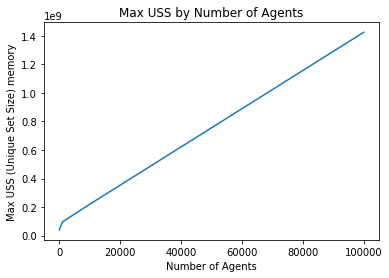

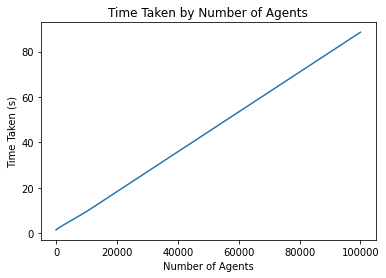

In [15]:
src_path = Path("./benchmarking/experiments/num_agents/age_behavior/init_js/age_js")

results = []
for power in range(6):
    num_agents = 10**power
    print(f"Benchmarking with {num_agents} agents")
    res = write_to_globals_and_benchmark(src_path, {"num_agents": num_agents}, num_steps=10)
    
    try:
        res = list(list(res.values())[0].values())[0] # TODO rework API to make this less unpleasant
        results.append((num_agents, res))
    except (AttributeError, IndexError): # if an experiment fails it's a NoneType, maybe we don't want to swallow errors
        pass
    
plot_time_and_mem(results)

### Current thoughts

Linear growth by number of agents, but even when we don't have behaviors.. That's a little worrying. It shouldn't take 40s to run 10 steps for 100,000 agents where you're not actually doing anything. 

Memory usage scales with agents, but adding a few fields doesn't change much, need to investigate how much of it is down to the built-in fields as again it's far too large currently. Adding a behavior doesn't seem to do much to memory usage, which is somewhat promising but it also implies that even if some steps/agents don't need a lot of data, we load it all anyway.

Adding the age behavior doesn't do much to time or memory usage.